# LIBS

In [32]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)

../results/Ising/disorder/PBC/


# MODEL INPUT AND OTHER INFO

In [33]:
base_info = hfun.info(cf.L, cf.J, cf.J0, cf.g, cf.g0, cf.h, cf.w, cf.k_sym, cf.p_sym, cf.x_sym)
print(base_info)
print(hfun.remove_info(base_info, 'g', 'w', 'L'))
hfun.print_vars(cf.params_arr, cf.names)


_L=16,J=1.00,J0=0.00,g=0.90,g0=0.00,h=0.80,w=0.30.dat
,J=1.00,J0=0.00,g0=0.00,h=0.80
L=16
J=1.00
g=0.90
h=0.80
w=0.30
k=0
p=1
x=1
J0=0.00
x0=0.00


# SPECTRAL FORM FACTOR

# THOULESS TIME

### PLOT DATA

{'vs': 'g', 'scaling': 'L', 'x_scale': 'linear', 'y_scale': 'log', 'physical_units': 1, 'rescaleY': 0, 'func_y': 'log', 'nu_y': 3, 'rescaleX': 1, 'func_x': 'power-law', 'nu_x': -1, 'vs_idx': 2, 'scaling_idx': 0, 'func_x_name': '$Q^{-1}$', 'func_y_name': '$Q$'}
L=16
J=1.00
g=0.90
h=0.80
w=0.30
k=0
p=1
x=1
J0=0.00
x0=0.00
0.6666666666666666 20.0 0.013607632929599999 4.703815731122449 2 0
not found
{'vs': 'L', 'scaling': 'g', 'x_scale': 'log', 'y_scale': 'log', 'physical_units': 1, 'rescaleY': 0, 'func_y': 'log', 'nu_y': 3, 'rescaleX': 0, 'func_x': 'power-law', 'nu_x': 2.0, 'vs_idx': 0, 'scaling_idx': 2, 'func_x_name': '$Q$', 'func_y_name': '$Q$'}
L=16
J=1.00
g=0.55
h=0.80
w=0.30
k=0
p=1
x=1
J0=0.00
x0=0.00
10.0 16.0 3.5875291332000003 893.39490416 0 2
not found


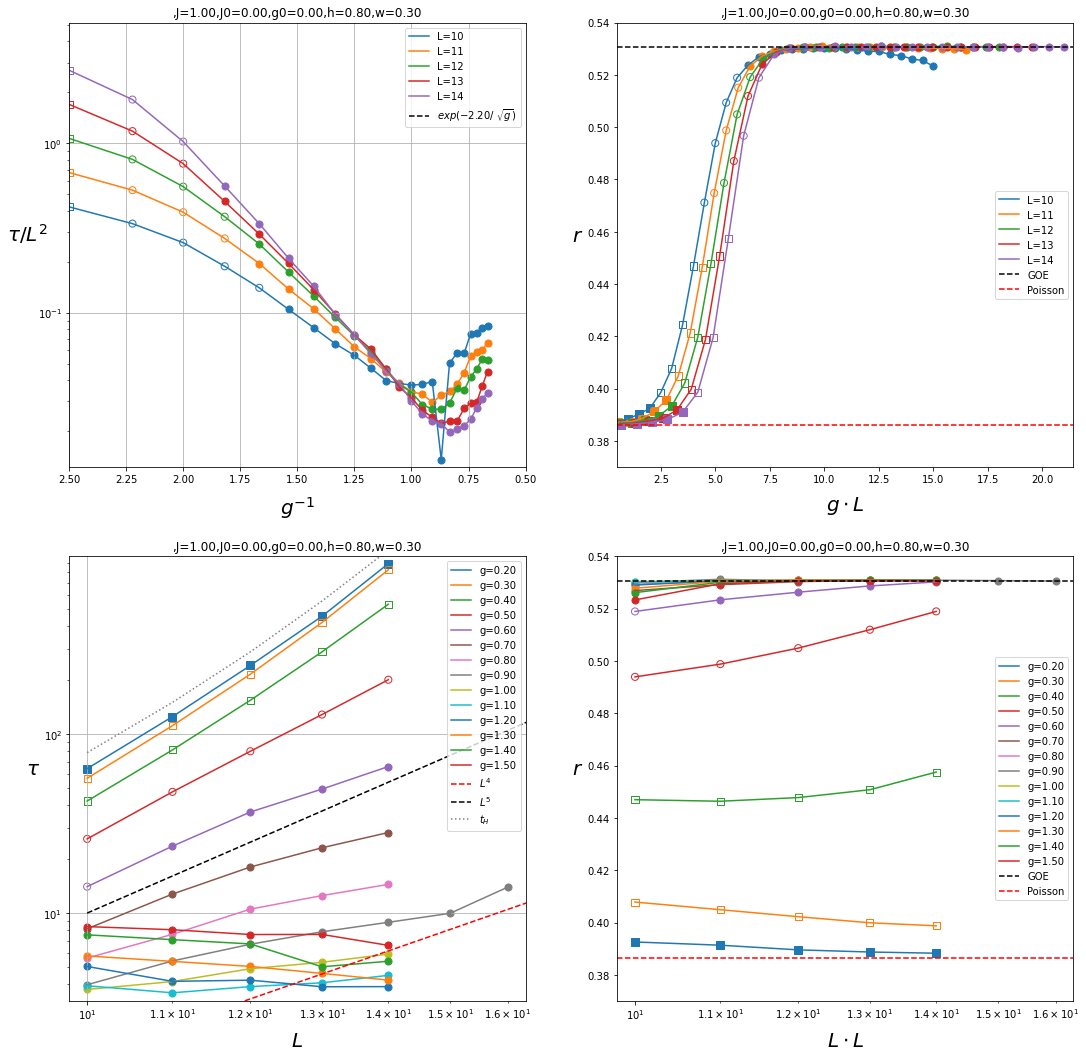

4.899079389427794


In [34]:
#--- set initial plot settings
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2)
fig.set_size_inches(18,18)
thouless.plot(axis1, axis2)

x = np.array(range(1, 150)) / 100.
sclabel = cf.plot_settings.settings['vs']
if cf.plot_settings.settings['vs_idx'] == 2:
    sclabel = hfun.var_name
#axis1.plot(cf.plot_settings.rescale(x, 'x'), (6e1 / (x/0.4)**2), ls='--', color='red', label=r"${%s}^{-2}$"%sclabel)
#axis1.plot(cf.plot_settings.rescale(x, 'x'), (3.3e1 / (x/0.4)**1.5), ls='--', color='blue', label=r"${%s}^{-1.5}$"%sclabel)
#a=2.2;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 1.5e1*np.exp(a / x**0.5 - a), ls='--', color='black', label=r"$exp(-%.2f /\ \sqrt{%s})$"%(a,sclabel))
a=2.2;  axis1.plot(cf.plot_settings.rescale(x, 'x'), 9e0*np.exp(a / x**0.5 - a), ls='--', color='black', label=r"$exp(-%.2f /\ \sqrt{%s})$"%(a,sclabel))
#axis1.plot(cf.plot_settings.rescale(x, 'x'), 1.2e1*np.exp(0.6 / x**2 - 1), ls='--', color='black', label=r"$exp(-0.6 /\ {%s}^2)$"%sclabel)

axis1.set_xlim([cf.plot_settings.rescale(0.4, 'x'), cf.plot_settings.rescale(2.0, 'x')])
#axis2.set_xlim([cf.plot_settings.rescale(0.01), cf.plot_settings.rescale(0.5)])
axis1.legend()

new_settings = cf.plot_settings
new_settings.set_vs('L')
new_settings.set_scaling('g')
new_settings.set_x_rescale(rescale = 0)
new_settings.set_scales(xscale = 'log', yscale = 'log')
cf.set_params(_g=0.55)
thouless.plot(axis3, axis4, new_settings.settings)

def heisenberg_time(system_size):
    dim = 2**system_size
    chi = 0.341345
    return (chi * dim) / ( system_size**(0.5)  * np.sqrt(cf.J * cf.J + cf.h * cf.h + cf.g * cf.g + (cf.w * cf.w + cf.g0 * cf.g0 + cf.J0 * cf.J0) / 3.) )
x = np.array(range(10, 19)).astype(np.float)
sclabel = new_settings.settings['vs']
n = 4;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (1.6e0* (x/10.)**(n)), ls='--', color='red', label=r"${%s}^{%d}$"%(sclabel, n))
n = 5;  axis3.plot(cf.plot_settings.rescale(x, 'x'), (1e1* (x/10.)**(n)), ls='--', color='black', label=r"${%s}^{%d}$"%(sclabel, n))
axis3.plot(cf.plot_settings.rescale(x, 'x'), heisenberg_time(x), ls=':', color='gray', label=r"$t_H$")
axis3.legend()
plt.show()

print(np.log(10) / np.log(1.6))